## Decompose GSM into zones with similar spectral index etc.

Phil Bull, 2022-11-28

In [3]:
import numpy as np
import pylab as plt
import pygdsm
import healpy as hp
import time

In [3]:
sky_model = pygdsm.GlobalSkyModel2016(freq_unit='MHz', data_unit='TRJ', resolution='hi')

In [21]:
freqs = np.array([100., 200.])
m = sky_model.generate(freqs)
beta = np.log(m[1] / m[0]) / np.log(freqs[1] / freqs[0])

/tmp/ipykernel_2954871/424246743.py:3: RuntimeWarning: invalid value encountered in log
  beta = np.log(m[1] / m[0]) / np.log(freqs[1] / freqs[0])


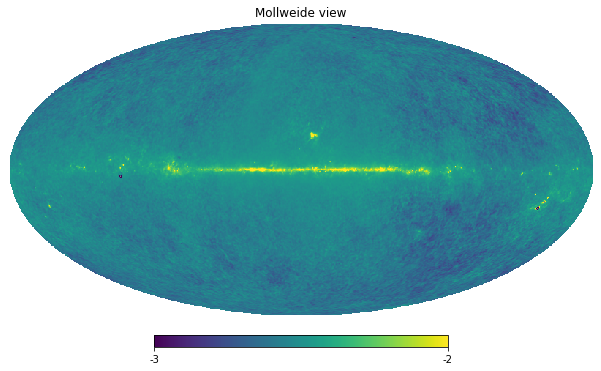

In [22]:
ax = hp.mollview(beta, min=-3., max=-2.)

(array([1.700000e+01, 2.000000e+01, 2.500000e+01, 3.700000e+01,
        3.100000e+01, 2.600000e+01, 2.900000e+01, 3.300000e+01,
        5.000000e+01, 6.500000e+01, 7.300000e+01, 9.600000e+01,
        1.470000e+02, 1.500000e+02, 2.560000e+02, 1.733000e+03,
        6.948500e+04, 8.840370e+05, 4.029478e+06, 5.624008e+06,
        1.573906e+06, 2.356310e+05, 7.383300e+04, 3.591100e+04,
        2.032000e+04, 1.287000e+04, 7.805000e+03, 4.927000e+03,
        2.616000e+03, 1.545000e+03, 8.990000e+02, 6.180000e+02,
        4.420000e+02, 2.540000e+02, 1.790000e+02, 8.600000e+01,
        6.500000e+01, 6.500000e+01, 1.800000e+01, 1.700000e+01]),
 array([-4.   , -3.925, -3.85 , -3.775, -3.7  , -3.625, -3.55 , -3.475,
        -3.4  , -3.325, -3.25 , -3.175, -3.1  , -3.025, -2.95 , -2.875,
        -2.8  , -2.725, -2.65 , -2.575, -2.5  , -2.425, -2.35 , -2.275,
        -2.2  , -2.125, -2.05 , -1.975, -1.9  , -1.825, -1.75 , -1.675,
        -1.6  , -1.525, -1.45 , -1.375, -1.3  , -1.225, -1.15 , -1.075

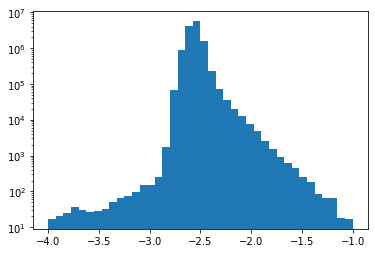

In [26]:
plt.hist(beta, bins=40, range=(-4., -1.), log=True)

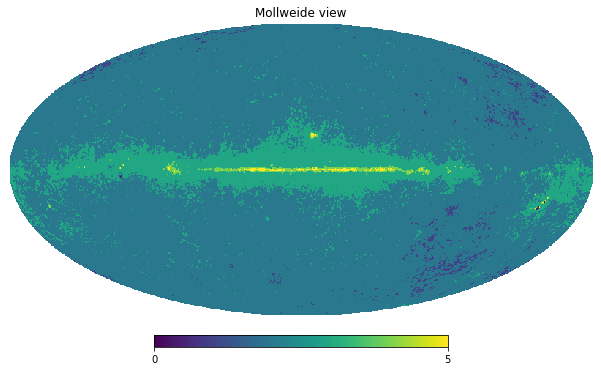

In [27]:
y = np.zeros_like(beta)
y[beta < -2.7] = 1
y[(beta >= -2.7) & (beta < -2.5)] = 2
y[(beta >= -2.5) & (beta < -2.3)] = 3
y[(beta >= -2.3) & (beta < -2.1)] = 4
y[beta >= -2.1] = 5
hp.mollview(y)

In [62]:
def spectral_index_segments_basic(maps, freqs, boundaries, region_npix=None, 
                                  fill_masked=True, avg_fn=np.mean):
    """
    Split map into regions based on the spectral index calculated between 
    two frequencies. This can result in region with quite disjoint morphologies 
    and complicated boundaries.
    
    Parameters:
        maps (array_like):
            Array of healpix maps, with shape (2, Npix).
        freqs (tuple):
            Pair of frequencies, in Hz, MHz, or GHz.
        boundaries (array_like):
            Boundaries of bins in spectral index.
        region_npix (int):
            If specified, downgrade the resolution of the beta map to 
            simplify the region boundaries, and then upgrade to the 
            original resolution.
        fill_masked (bool):
            If True, fill masked pixels with the mean of the neighbouring 
            pixels of the spectral index map.
        avg_fn (function):
            Which function to use to calculate the representative 
            spectral index of each region. By default, it uses the 
            mean.
    
    Returns:
        beta (array_like):
            Healpix map with the same resolution as the input map, 
            but with integer region IDs as the map values.
    """
    assert maps.shape[0] == 2, "Requires a pair of Healpix maps"
    assert len(freqs) == 2, "Requires a pair of frequencies"
    
    # Make sure boundaries are ordered
    if not np.all(boundaries[:-1] < boundaries[1:]):
        raise ValueError("boundaries array must be sorted in ascending order")
    
    # Calculate per-pixel spectral index map
    beta = np.log(maps[1] / maps[0]) \
         / np.log(freqs[1] / freqs[0])
    
    # Fill masked regions if requested
    if fill_masked:
        idxs = np.where(np.isnan(beta))
        print(idxs)
    
    # Loop over bins
    regions = np.zeros_like(maps[0])
    regions[:] = np.nan
    for i in range(len(boundaries) - 1):
        regions[(beta >= boundaries[i]) & (beta < boundaries[i+1])] = i
    
    # If region_npix is set, downgrade and then upgrade the 
    # resolution to simplify the region shapes
    if region_npix is not None:
        npix_in = hp.npix2nside(maps[0].size)
        r = hp.ud_grade(regions, nside_out=region_npix, pess=False)
        regions = hp.ud_grade(r, nside_out=npix_in, pess=False)
        regions = np.round(regions, decimals=0)
    return regions

/tmp/ipykernel_2954871/418325534.py:40: RuntimeWarning: invalid value encountered in log
  beta = np.log(maps[1] / maps[0]) \


(array([6647025, 6647027, 6651120, 6651121, 6651122, 6651123, 6655217,
       6655218, 6655219, 6655220, 6655222, 6659313, 6659314, 6659315,
       6659316, 6659317, 6659318, 6663410, 6663411, 6663412, 6663413,
       6663414, 6663415, 6667506, 6667507, 6667508, 6667509, 6667510,
       6667511, 6671603, 6671605, 6671606, 6671607, 6675701, 6675702,
       6679798, 8003885, 8003886, 8003887, 8007980, 8007981, 8007982,
       8007983, 8007984, 8012075, 8012076, 8012077, 8012078, 8012079,
       8012080, 8016171, 8016172, 8016173, 8016174, 8016175, 8016176,
       8016177, 8020266, 8020267, 8020268, 8020269, 8020270, 8020271,
       8020272, 8020273, 8024362, 8024363, 8024364, 8024365, 8024366,
       8024367, 8024368, 8024369, 8024370, 8028457, 8028458, 8028459,
       8028460, 8028461, 8028462, 8028463, 8028464, 8028465, 8028466,
       8032553, 8032554, 8032555, 8032556, 8032557, 8032559, 8032560,
       8032561, 8032562, 8032563, 8036648, 8036649, 8036650, 8036651,
       8036655, 803

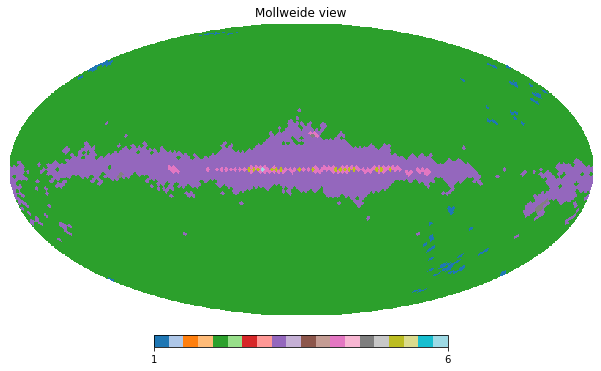

In [63]:
y = spectral_index_segments_basic(m, freqs, boundaries=[-4., -3., -2.7, -2.5, -2.3, -2.1, -1.9, -1.], region_npix=32)
hp.mollview(y, cmap='tab20')

In [64]:
hp.query_disc?

/tmp/ipykernel_2954871/4185847605.py:28: RuntimeWarning: invalid value encountered in log
  beta = np.log(maps[1] / maps[0]) \


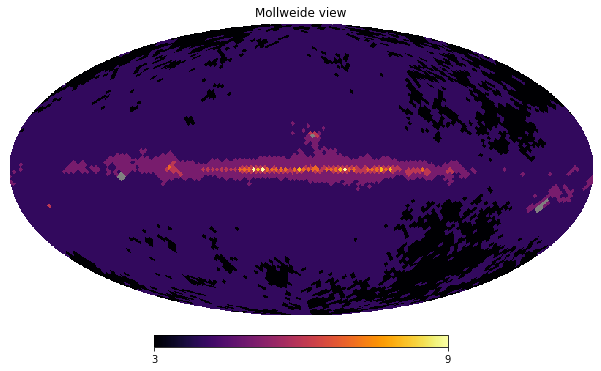

In [61]:
y = spectral_index_segments_basic(m, freqs, boundaries=np.linspace(-3.2, -1., 16), region_npix=32)
hp.mollview(y, cmap='inferno')

## Source projection operator
Each region is treated as a source

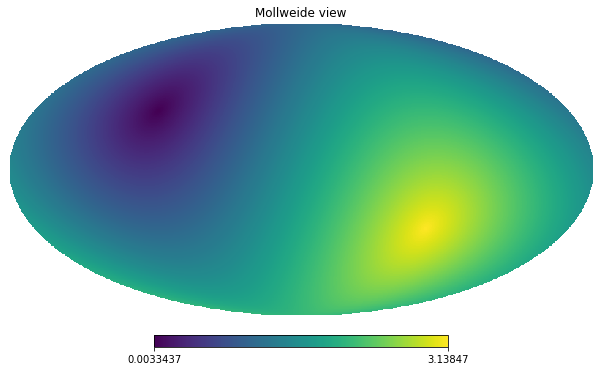

In [73]:
hp.mollview(theta_eq)

In [74]:
from hydra.vis_simulator import simulate_vis

def calc_proj_operator_per_region(
    fluxes, region_idxs, ant_pos, antpairs, freqs, times, beams,
    latitude=-0.5361913261514378, multiprocess=True
):
    """
    Calculate a visibility vector for each region of a healpix/healpy map, 
    as a function of frequency, time, and baseline. This is the projection 
    operator from region amplitude to visibilities. Gains are not included.
    
    Parameters:
        fluxes (array_like):
            Flux for each pixel source as a function of frequency. Assumed to 
            be a healpy/healpix array (in Galactic coords) per frequency, with 
            shape `(Npix, Nfreq)`.
        region_idxs (array_like):
            A healpix/healpy map with the integer region ID of each pixel.
        ant_pos (dict):
            Dictionary of antenna positions, [x, y, z], in m. The keys should
            be the numerical antenna IDs.
        antpairs (list of tuple):
            List of tuples containing pairs of antenna IDs, one for each
            baseline.
        freqs (array_like):
            Frequencies, in MHz.
        times (array_like):
            LSTs, in radians.
        beams (list of UVBeam):
            List of UVBeam objects, one for each antenna.
        latitude (float):
            Latitude of the observing site, in radians.
        multiprocess (bool): Whether to use multiprocessing to speed up the
            calculation
    Returns:
        vis_proj_operator (array_like):
            The projection operator from region amplitudes to visibilities. 
            This is an array of the visibility value contributed by each 
            region if its amplitude were 1.
        unique_regions (array_like):
            An ordered list of integer region IDs.
    """
    unique_regions = np.unique(region_idxs)
    Nregions = unique_regions.size
    Nants = len(ant_pos)
    Nvis = len(antpairs)
    assert fluxes.shape[1] == len(freqs), "`fluxes` must have shape (Npix, Nfreqs)"
    
    # Get pixel Galactic and then equatorial coords of each map pixel (radians)
    nside = hp.npix2nside(re.size)
    theta_gal, phi_gal = hp.pix2ang(nside=nside, ipix=np.arange(m[0].size), lonlat=False)
    theta_eq, phi_eq = hp.Rotator(coord='ge', deg=False)(theta_gal, phi_gal)

    # Empty array of per-point source visibilities
    vis_regions = np.zeros((Nvis, freqs.size, times.size, Nregions), dtype=np.complex128)

    # Get visibility for each region
    for i in range(Nregions):
        
        # Get indices of pixels that are in this region
        idxs = np.where(region_idxs == unique_regions[i])
        
        # Simulate visibility for this region
        # Returns shape (Nfreqs, Ntimes, Nants, Nants)
        vis = simulate_vis(
            ants=ant_pos,
            fluxes=fluxes[idxs,:],
            ra=phi_eq[idxs], # FIXME: Make sure these occupy the correct range!
            dec=theta_eq[idxs],
            freqs=freqs * 1e6,
            lsts=times,
            beams=beams,
            polarized=False,
            precision=2,
            latitude=latitude,
            use_feed="x",
            multiprocess=multiprocess
        )

        # Allocate computed visibilities to only available baselines (saves memory)
        ants = list(ant_pos.keys())
        for j, bl in enumerate(antpairs):
            idx1 = ants.index(bl[0])
            idx2 = ants.index(bl[1])
            vis_regions[j, :, :, i] = vis[:, :, idx1, idx2, i]

    return vis_regions, unique_regions

ModuleNotFoundError: No module named 'hydra'

In [18]:
vv = np.ones((2,4))
np.ones(list(vv.shape)+[3,]).shape

(2, 4, 3)

In [19]:
hp.alm2map?

In [ ]:
hp.Alm().getidx